In [28]:
import scipy as sp
import math
import matplotlib.pyplot as plt
import numpy as np
import cmath

A) Using the expansion coefficients from n=1 up to n=20 (instead of worrying about the infinite sum), plot the regenerated initial wave function. Take hx = 1; m = 1; a= 1. Check if this indeed matches the given initial wave function. 


In [49]:
# Setting up constants
h = 1
pi2 = math.pow(math.pi, 2)
m = 1
a = 1
cpi2 = complex(math.pow(cmath.pi, 2))

omega = pi2*h / 2 * m * math.pow(a,2)
T = 2 * math.pi / omega

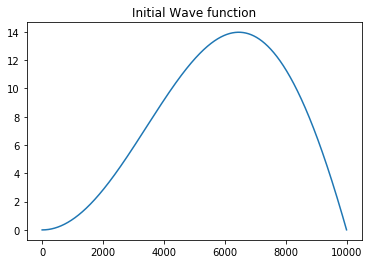

In [25]:
A = (1/math.pow(a, 3/2)) * (math.sqrt((12*pi2)/2*pi2-3))

phix0 = []

for x in np.arange(0, 1, .0001 ):
    phix0.append( A * x * math.sin((math.pi * x) /a))
    
plt.plot(phix0)
plt.title("Initial Wave function")
plt.show()

this plot shows the initial wave function of the initial wave function at time equals 0.

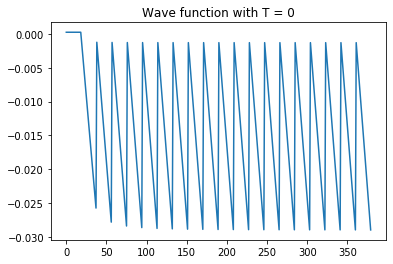

In [59]:
# First attempt
phixtweret0 = []

#for this calculation t will equal 0

t=0
nsum = 0

for i in range(0, 40, 2):
    nsum += (1/math.pow(i-1,2))-(1/math.pow(i+1, 2))

#for x in np.arange(0, 1, .0001):
    x = 0.0001
    for n in range(1,20):
        phixtweret0.append(complex((1/2)) *
           cmath.sqrt((6 * cpi2)/(2*cpi2 -3)) * 
           (cmath.sqrt(2/cmath.pi))*
           cmath.sin(cmath.pi * x / a) *
           complex(math.pow(math.e, (-cmath.sqrt(-1) * omega * t).real))
           - complex((1/cpi2)) *
           cmath.sqrt((24 * cpi2) / 2 * cpi2 -3 ) *
           cmath.sqrt(2/a) *
           complex(nsum) *
           cmath.sin((n * math.pi * x) / a) *
           complex(math.pow(math.e, (-cmath.sqrt(-1) * omega * t).real)))
           
           
           
plt.plot(phixtweret0)
plt.title("Wave function with T = 0")
plt.show()          

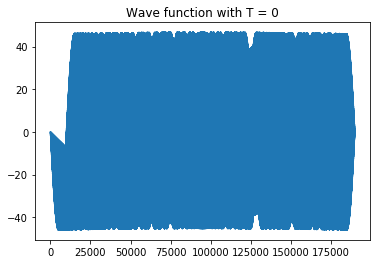

In [67]:
# Second attempt

# First attempt
phixtweret0 = []

#for this calculation t will equal 0

t=0
nsum = .5 * math.sqrt(6* pi2 / 2*pi2 -3)

for i in range(2, 4, 2):
    nsum += (1/math.pow(i-1,2))-(1/math.pow(i+1, 2))

for x in np.arange(0, 1, .0001):
    for n in range(1,20):
        phixtweret0.append((1/2) *
           math.sqrt((6 * pi2)/(2*pi2 -3)) * 
           (math.sqrt(2/math.pi))*
           math.sin(math.pi * x / a) *
           math.pow(math.e, 0)
           - (1/pi2) *
           math.sqrt((24 * pi2) / 2 * pi2 -3 ) *
           math.sqrt(2/a) *
           nsum *
           math.sin((n * math.pi * x) / a) *
           math.pow(math.e, 0))
           
           
           
plt.plot(phixtweret0)
plt.title("Wave function with T = 0")
plt.show()          


